## Decision Tree Classification

### Cody Bullock

    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




### Data import and transformation

The .csv dataset was imported into the program as a Pandas dataframe, the irrelevant "Team" column was dropped, and the dataframe statistics were printed.

In [2]:
df = pd.read_csv("Data/Final files/AllFinalv4.csv")
df.drop(columns=["Team"], inplace=True)
pd.set_option("display.max_columns", None)
df.describe()

,Wins,Seed,PPG,AST,AST/TO Ratio,BKPG,FG%,OPP FG,OPP FGA,OPP FG%,FTA,FT%,Fouls,REB,RPG,OPP REB,OPP RPG,REB MAR,OPP PPG,SCR MAR,3FGA,3FG%,Opp 3FGA,Opp 3FG,Opp 3FG Pct,Opp TO,TO,Turnover Ratio,W/L Pct,ORebs,ORPG,DRebs,DRPG
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000
mean,0.991166,8.492933,75.345936,463.153710,1.228216,3.923498,46.111131,761.464664,1826.809187,41.660424,655.740283,71.667138,556.975265,1170.303887,36.443993,1067.842756,33.251237,3.190283,66.872615,8.470141,671.353357,35.946466,657.058304,216.022968,32.847350,421.998233,381.810954,1.238869,73.257244,344.277385,10.708304,826.026502,25.734523
std,1.344248,4.603475,4.934951,73.619972,0.215696,1.051705,2.242738,92.797665,194.391692,2.066185,120.487085,3.588445,78.696073,130.481991,2.545881,119.136710,2.349097,3.290350,4.739935,4.262706,118.744847,2.542999,100.451063,36.939671,2.124218,67.317488,51.937246,1.974620,9.744928,66.293280,1.777621,89.476438,1.812805
min,0.000000,1.000000,61.700000,237.000000,0.690000,1.400000,40.300000,363.000000,910.000000,35.500000,278.000000,59.800000,235.000000,596.000000,26.200000,525.000000,26.300000,-7.400000,50.700000,-4.300000,340.000000,27.600000,345.000000,92.000000,26.100000,181.000000,151.000000,-3.900000,40.600000,146.000000,6.000000,448.000000,19.090000
25%,0.000000,4.250000,72.100000,417.000000,1.070000,3.100000,44.600000,712.000000,1751.250000,40.300000,579.000000,69.200000,512.000000,1108.500000,34.800000,1012.000000,31.600000,1.100000,63.700000,5.400000,587.250000,34.225000,582.000000,191.000000,31.400000,383.000000,351.000000,-0.175000,65.625000,300.000000,9.455000,784.000000,24.590000
50%,1.000000,9.000000,75.100000,463.000000,1.215000,3.850000,46.000000,768.000000,1848.500000,41.700000,656.500000,71.700000,559.000000,1187.000000,36.300000,1077.000000,33.100000,3.100000,67.100000,8.150000,669.000000,35.900000,667.500000,217.000000,32.900000,419.000000,384.000000,1.300000,73.100000,347.000000,10.725000,832.000000,25.620000
75%,2.000000,12.000000,78.700000,509.000000,1.370000,4.700000,47.500000,824.000000,1949.750000,43.000000,741.000000,74.275000,610.000000,1251.500000,38.200000,1146.750000,34.900000,5.175000,69.975000,11.000000,748.000000,37.700000,724.000000,240.750000,34.200000,463.000000,417.750000,2.600000,79.400000,392.000000,11.967500,882.750000,26.810000
max,6.000000,16.000000,92.100000,709.000000,2.010000,7.900000,55.100000,999.000000,2268.000000,48.200000,1025.000000,82.400000,795.000000,1508.000000,44.400000,1412.000000,40.700000,12.700000,81.600000,23.800000,1052.000000,44.900000,960.000000,361.000000,38.500000,695.000000,555.000000,8.200000,100.000000,541.000000,16.840000,1074.000000,32.070000


The labels, "Wins", and features were extracted from the dataset and transformed into numpy arrays.

In [3]:
target = df["Wins"]
data = df.iloc[:, 1:]
target = target.to_numpy()
data = data.to_numpy()

### Cross validtated grid search for hyperparameters - Balanced Accuracy

The following hyperparameters were searched:  
    Criterion: Function used to measure the quality of a split  
    Max Depth: Maximum depth of the tree  
    Min Samples Leaf: Minimum number of samples required to be in leaf node  

Class Weight parameter was set to balanced since the dataset is imbalanced.

Performance of each combination was evaluated with "balanced_accuracy" since the dataset is imbalanced. If "accuracy" was used instead, the model could acheive high accuracy just by predicting all samples to be of the most frequent class.

The ten combinations of hyperparameters with the highest average balanced accuracies were displayed.

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import balanced_accuracy_score

parameters = {"criterion":("gini","entropy","log_loss"), "max_depth":[1,2,4,6,8,10,15], "min_samples_leaf":[1,2,3,4,5,6,7]}

tree = DecisionTreeClassifier(random_state=7, class_weight="balanced")

cv = GridSearchCV(tree, parameters, cv=5, scoring="balanced_accuracy")

cv.fit(data, target)
tree_results = pd.DataFrame(cv.cv_results_)
tree_results.sort_values(by=["mean_test_score"],inplace=True,ascending=False)
tree_results = tree_results[["param_criterion","param_max_depth","param_min_samples_leaf","mean_test_score","std_test_score"]]
tree_results.head(10)

,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score
125,log_loss,6,7,0.242933,0.044721
76,entropy,6,7,0.242933,0.044721
69,entropy,4,7,0.241932,0.049065
118,log_loss,4,7,0.241932,0.049065
73,entropy,6,4,0.241611,0.047266
122,log_loss,6,4,0.241611,0.047266
66,entropy,4,4,0.240564,0.046676
115,log_loss,4,4,0.240564,0.046676
116,log_loss,4,5,0.240045,0.047086
67,entropy,4,5,0.240045,0.047086


The classes, "Wins", of the training data were predicted using the model with the highest average balanced accuracy from the cross-validated grid-search. 

The balanced accuracy was printed and confusion matrices were plotted to display how well the model performed on the training data as a whole.

The top confusion matrix was normalized over the rows (recall).  
The middle confusion matrix was normalized over the columns (precision).  
The bottom confusion matrix was not normalized (absolute count).  

Balanced Accuracy Score: 0.65


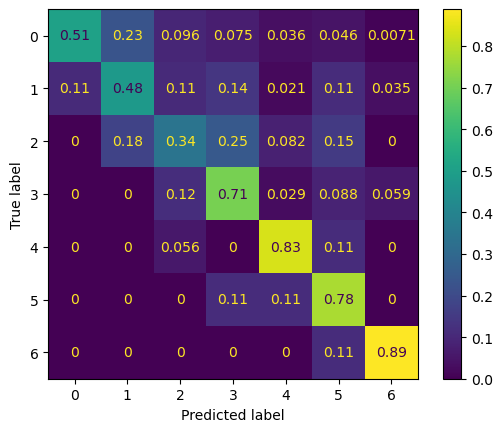

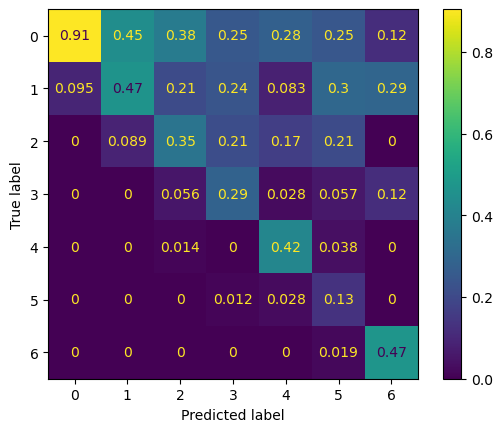

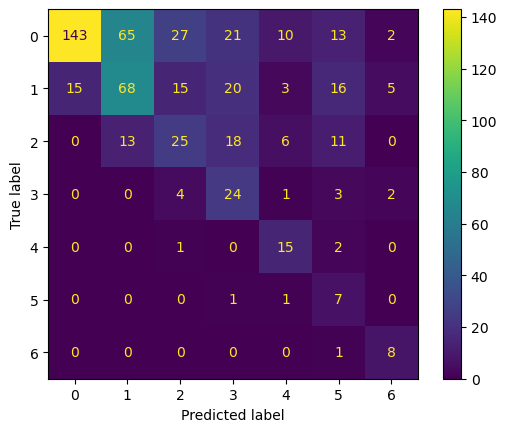

In [6]:
tree_results = cv.best_estimator_.predict(data)
print(f"Balanced Accuracy Score: {balanced_accuracy_score(target,tree_results):.2f}")
cm = confusion_matrix(target,tree_results, normalize="true")
cm2 = confusion_matrix(target,tree_results, normalize="pred")
cm3 = confusion_matrix(target,tree_results)
disp = ConfusionMatrixDisplay(cm)
disp2 = ConfusionMatrixDisplay(cm2)
disp3 = ConfusionMatrixDisplay(cm3)
disp.plot()
disp2.plot()
disp3.plot()
plt.show()

The classes, "Wins", of the training data were predicted using a model with a high average balanced accuracy from the cross-validated grid-search, and with a max depth of 4. This was due to the want for increased explainability and decreased overfitting.  

The balanced accuracy was printed and confusion matrices were plotted to display how well the model performed on the training data as a whole.

The top confusion matrix was normalized over the rows (recall).  
The middle confusion matrix was normalized over the columns (precision).  
The bottom confusion matrix was not normalized (absolute count).  ount).

Balanced Accuracy Score: 0.50


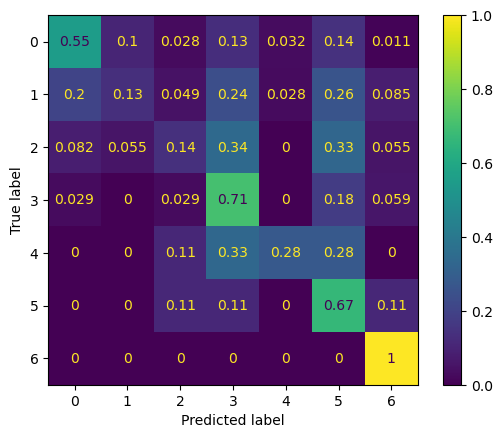

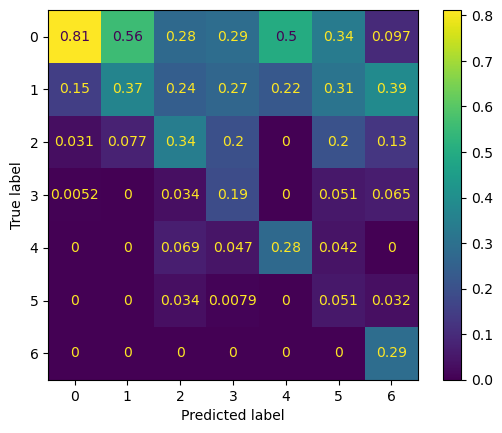

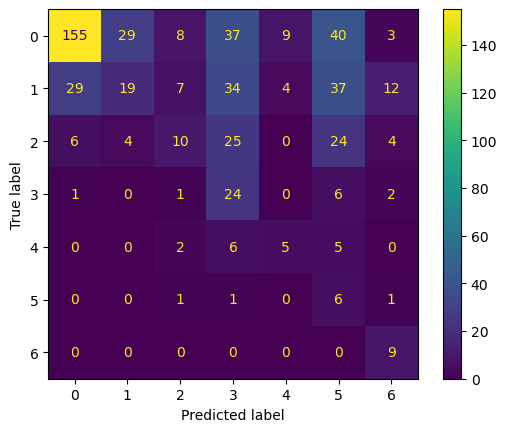

In [10]:
tree2 = DecisionTreeClassifier(random_state=7, class_weight="balanced", criterion="entropy", min_samples_leaf=7, max_depth=4)
tree2.fit(data,target)
tree2_results = tree2.predict(data)
print(f"Balanced Accuracy Score: {balanced_accuracy_score(target,tree2_results):.2f}")
cm = confusion_matrix(target,tree2_results, normalize="true")
cm2 = confusion_matrix(target,tree2_results, normalize="pred")
cm3 = confusion_matrix(target,tree2_results)
disp = ConfusionMatrixDisplay(cm)
disp2 = ConfusionMatrixDisplay(cm2)
disp3 = ConfusionMatrixDisplay(cm3)
disp.plot()
disp2.plot()
disp3.plot()
plt.show()

The node counts for the best model and the model with a smaller max depth were displayed to highlight just how much more explainable is the model with a smaller max depth.

In [11]:
tree = cv.best_estimator_
print(f"Node count for tree 1: {tree.tree_.node_count}")

print(f"Node count for tree 2: {tree2.tree_.node_count}")

Node count for tree 1: 75
Node count for tree 2: 29


### Tree export for visualization

The decision tree with the smaller max depth was exported

In [12]:
from sklearn import tree
import graphviz

df_features = df.iloc[:, 1:]
class_names = ["0","1","2","3","4","5","6"]

graph = tree.export_graphviz(tree2, out_file=None, feature_names = df_features.columns,
                             class_names = class_names, filled = True, rounded = True, special_characters = True,
                            proportion = True, rotate = True, precision = 2)
graph = graphviz.Source(graph)
graph.render("BalancedAccTree")

'BalancedAccTree.pdf'

### Cross validtated grid search for hyperparameters - F1 Score

The following hyperparameters were searched:  
    Criterion: Function used to measure the quality of a split  
    Max Depth: Maximum depth of the tree  
    Min Samples Leaf: Minimum number of samples required to be in leaf node  

Class Weight parameter was set to balanced since the dataset is imbalanced.

Performance of each combination was evaluated with "f1_weighted". The F1 Score is the mean of precision and recall. The f1 score is weighted so as to take the weighted average f1 score of all classes.  

The ten combinations of hyperparameters with the highest average balanced accuracies were displayed.

In [13]:
from sklearn.metrics import f1_score

parameters = {"criterion":("gini","entropy","log_loss"), "max_depth":[1,2,4], "min_samples_leaf":[1,2,3,4,5,6,7]}

tree = DecisionTreeClassifier(random_state=7, class_weight="balanced")

cv = GridSearchCV(tree, parameters, cv=5, scoring="f1_weighted")

cv.fit(data, target)
tree_results = pd.DataFrame(cv.cv_results_)
tree_results.sort_values(by=["mean_test_score"],inplace=True,ascending=False)
tree_results = tree_results[["param_criterion","param_max_depth","param_min_samples_leaf","mean_test_score","std_test_score"]]
tree_results.head(10)

,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score
14,gini,4,1,0.367250,0.043696
15,gini,4,2,0.362112,0.043630
16,gini,4,3,0.358703,0.044217
18,gini,4,5,0.356906,0.049037
26,entropy,1,6,0.354691,0.013604
21,entropy,1,1,0.354691,0.013604
22,entropy,1,2,0.354691,0.013604
23,entropy,1,3,0.354691,0.013604
25,entropy,1,5,0.354691,0.013604
24,entropy,1,4,0.354691,0.013604


The classes, "Wins", of the training data were predicted using the model with the highest average f1 weighted score from the cross-validated grid-search.  

The balanced accuracy was printed and confusion matrices were plotted to display how well the model performed on the training data as a whole.  

The top confusion matrix was normalized over the rows (recall).  
The middle confusion matrix was normalized over the columns (precision).  
The bottom confusion matrix was not normalized (absolute count).  ount).

Balanced Accuracy Score: 0.50


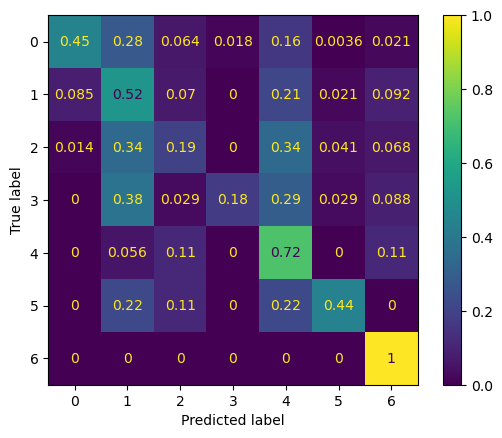

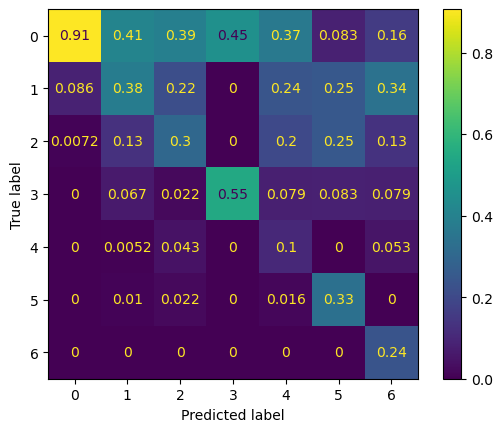

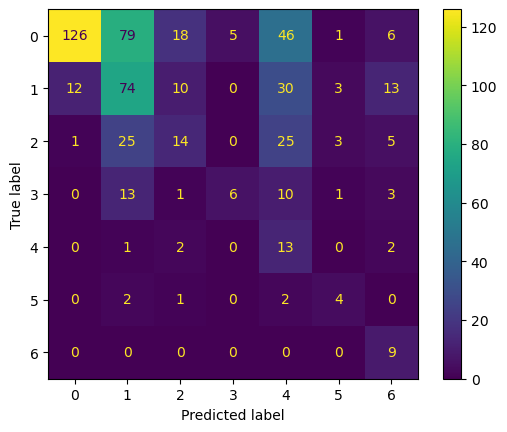

In [15]:
tree1 = cv.best_estimator_
tree_results = cv.best_estimator_.predict(data)
print(f"Balanced Accuracy Score: {balanced_accuracy_score(target,tree_results):.2f}")
cm = confusion_matrix(target,tree_results, normalize="true")
cm2 = confusion_matrix(target,tree_results, normalize="pred")
cm3 = confusion_matrix(target,tree_results)
disp = ConfusionMatrixDisplay(cm)
disp2 = ConfusionMatrixDisplay(cm2)
disp3 = ConfusionMatrixDisplay(cm3)
disp.plot()
disp2.plot()
disp3.plot()
plt.show()

### Tree export for visualization

The decision tree with highest average f1 weighted score was exported.

In [16]:
from sklearn import tree
import graphviz

graph = tree.export_graphviz(tree1, out_file=None, feature_names = df_features.columns,
                             class_names = class_names, filled = True, rounded = True, special_characters = True,
                            proportion = True, rotate = True, precision = 2)
graph = graphviz.Source(graph)
graph.render("F1WeightedTree")

'F1WeightedTree.pdf'

### Model Persistence

The trees were saved in order to be used with the test set.  

In [17]:
from joblib import dump,load
dump(tree2, "BalancedAccTree.joblib")
dump(tree1, "F1WeightedTree.joblib")

['F1WeightedTree.joblib']